In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

# Set matplotlib to display figures inline in the notebook
%matplotlib inline

In [2]:
# Load the Iris dataset using read_csv
iris_df = pd.read_csv('../iris.csv')

# Display column names to understand the dataset structure
print("Column names in the dataset:", iris_df.columns.tolist())

# Separate features and target variable
X = iris_df.iloc[:, :-1].values  # All rows, all columns except the last one
y = iris_df.iloc[:, -1].values   # All rows, only the last column (species)

# Get unique class names from the target column
target_names = np.unique(y)
print("Target class names:", target_names)

# Define feature names from columns
feature_names = iris_df.columns[:-1].tolist()
print("Feature names:", feature_names)

Column names in the dataset: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
Target class names: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
Feature names: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']


In [3]:
# Display the first few rows of the dataset
print("Iris Dataset (First 5 rows):")
iris_df.head()

Iris Dataset (First 5 rows):


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Dataset information
print("Dataset Shape:", iris_df.shape)
print("\nFeature Names:", feature_names)
print("\nTarget Classes:", target_names)

Dataset Shape: (45, 5)

Feature Names: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

Target Classes: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [5]:
# Explore the dataset statistics
print("Feature Statistics:")
iris_df.describe()

Feature Statistics:


,sepal_length,sepal_width,petal_length,petal_width
count,45.000000,45.000000,45.000000,45.000000
mean,5.782222,3.011111,3.748889,1.195556
std,0.880157,0.421158,1.807135,0.793713
min,4.300000,2.000000,1.100000,0.100000
25%,5.000000,2.800000,1.500000,0.200000
50%,5.800000,3.000000,4.500000,1.400000
75%,6.500000,3.200000,5.100000,1.800000
max,7.600000,4.000000,6.600000,2.500000


In [6]:
# Class distribution
print("Class Distribution:")
iris_df['species'].value_counts()

Class Distribution:


species
Iris-setosa        15
Iris-versicolor    15
Iris-virginica     15
Name: count, dtype: int64

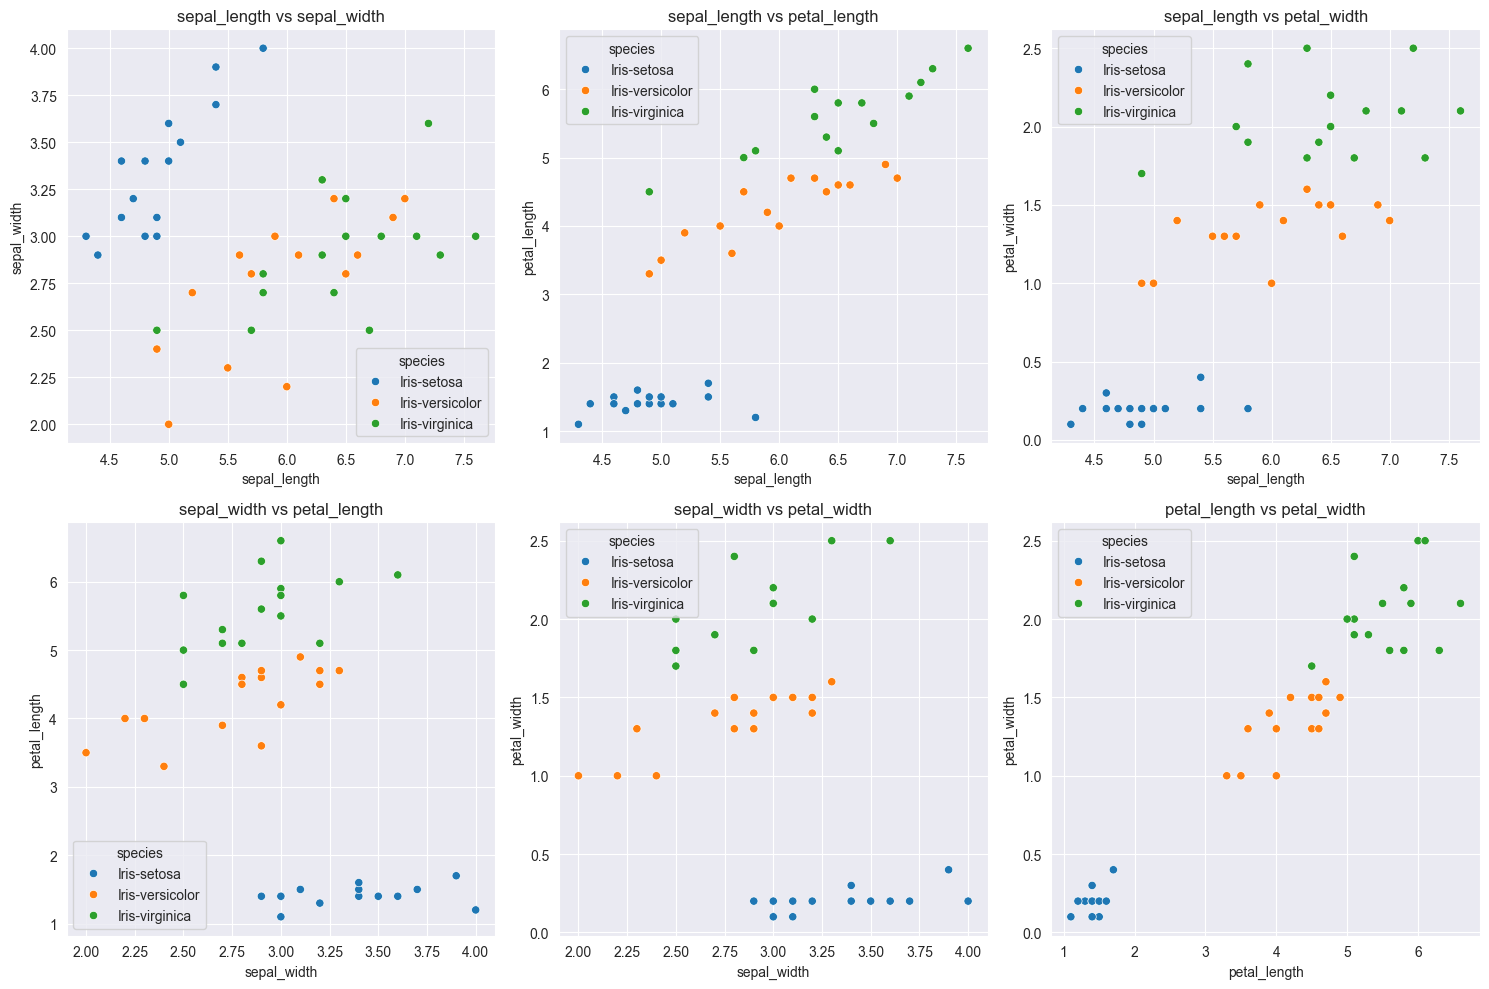

In [7]:
# Visualize the dataset with scatter plots for pairs of features
plt.figure(figsize=(15, 10))

# Create scatter plots for pairs of features
plt.subplot(2, 3, 1)
sns.scatterplot(x=iris_df.iloc[:, 0], y=iris_df.iloc[:, 1], hue=iris_df['species'])
plt.title(f'{feature_names[0]} vs {feature_names[1]}')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])

plt.subplot(2, 3, 2)
sns.scatterplot(x=iris_df.iloc[:, 0], y=iris_df.iloc[:, 2], hue=iris_df['species'])
plt.title(f'{feature_names[0]} vs {feature_names[2]}')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[2])

plt.subplot(2, 3, 3)
sns.scatterplot(x=iris_df.iloc[:, 0], y=iris_df.iloc[:, 3], hue=iris_df['species'])
plt.title(f'{feature_names[0]} vs {feature_names[3]}')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[3])

plt.subplot(2, 3, 4)
sns.scatterplot(x=iris_df.iloc[:, 1], y=iris_df.iloc[:, 2], hue=iris_df['species'])
plt.title(f'{feature_names[1]} vs {feature_names[2]}')
plt.xlabel(feature_names[1])
plt.ylabel(feature_names[2])

plt.subplot(2, 3, 5)
sns.scatterplot(x=iris_df.iloc[:, 1], y=iris_df.iloc[:, 3], hue=iris_df['species'])
plt.title(f'{feature_names[1]} vs {feature_names[3]}')
plt.xlabel(feature_names[1])
plt.ylabel(feature_names[3])

plt.subplot(2, 3, 6)
sns.scatterplot(x=iris_df.iloc[:, 2], y=iris_df.iloc[:, 3], hue=iris_df['species'])
plt.title(f'{feature_names[2]} vs {feature_names[3]}')
plt.xlabel(feature_names[2])
plt.ylabel(feature_names[3])

plt.tight_layout()
plt.show()

In [8]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (31, 4)
Testing set shape: (14, 4)


In [9]:
# Train the Naive Bayes classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# Make predictions
y_pred = nb_classifier.predict(X_test)

In [10]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Create a more readable confusion matrix with labels
cm_df = pd.DataFrame(cm, index=target_names, columns=target_names)
print("\nConfusion Matrix with Labels:")
cm_df

Confusion Matrix:
[[5 0 0]
 [0 4 0]
 [0 0 5]]

Confusion Matrix with Labels:


,Iris-setosa,Iris-versicolor,Iris-virginica
Iris-setosa,5,0,0
Iris-versicolor,0,4,0
Iris-virginica,0,0,5


In [11]:
# Extract TP, FP, TN, FN for each class
# For multiclass, we compute these metrics using one-vs-all approach
print("Metrics for each class (one-vs-all):")

for i, species in enumerate(target_names):
    # Create binary labels (current class vs all others)
    y_test_binary = (y_test == species).astype(int)
    y_pred_binary = (y_pred == species).astype(int)
    
    # Compute binary confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_test_binary, y_pred_binary).ravel()
    
    print(f"\nClass: {species}")
    print(f"True Positives (TP): {tp}")
    print(f"False Positives (FP): {fp}")
    print(f"True Negatives (TN): {tn}")
    print(f"False Negatives (FN): {fn}")
    
    # Calculate metrics
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    error_rate = 1 - accuracy
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Error Rate: {error_rate:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

Metrics for each class (one-vs-all):

Class: Iris-setosa
True Positives (TP): 5
False Positives (FP): 0
True Negatives (TN): 9
False Negatives (FN): 0
Accuracy: 1.0000
Error Rate: 0.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000

Class: Iris-versicolor
True Positives (TP): 4
False Positives (FP): 0
True Negatives (TN): 10
False Negatives (FN): 0
Accuracy: 1.0000
Error Rate: 0.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000

Class: Iris-virginica
True Positives (TP): 5
False Positives (FP): 0
True Negatives (TN): 9
False Negatives (FN): 0
Accuracy: 1.0000
Error Rate: 0.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000


In [12]:
# Overall classification metrics
print("Overall Classification Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Error Rate:", 1 - accuracy_score(y_test, y_pred))

# Calculate precision, recall, and F1 for each class and average
precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)
f1 = f1_score(y_test, y_pred, average=None)

print("\nPrecision for each class:", precision)
print("Recall for each class:", recall)
print("F1 Score for each class:", f1)

print("\nAverage Precision:", np.mean(precision))
print("Average Recall:", np.mean(recall))
print("Average F1 Score:", np.mean(f1))

Overall Classification Metrics:
Accuracy: 1.0
Error Rate: 0.0

Precision for each class: [1. 1. 1.]
Recall for each class: [1. 1. 1.]
F1 Score for each class: [1. 1. 1.]

Average Precision: 1.0
Average Recall: 1.0
Average F1 Score: 1.0


In [13]:
# Comprehensive classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         5
Iris-versicolor       1.00      1.00      1.00         4
 Iris-virginica       1.00      1.00      1.00         5

       accuracy                           1.00        14
      macro avg       1.00      1.00      1.00        14
   weighted avg       1.00      1.00      1.00        14



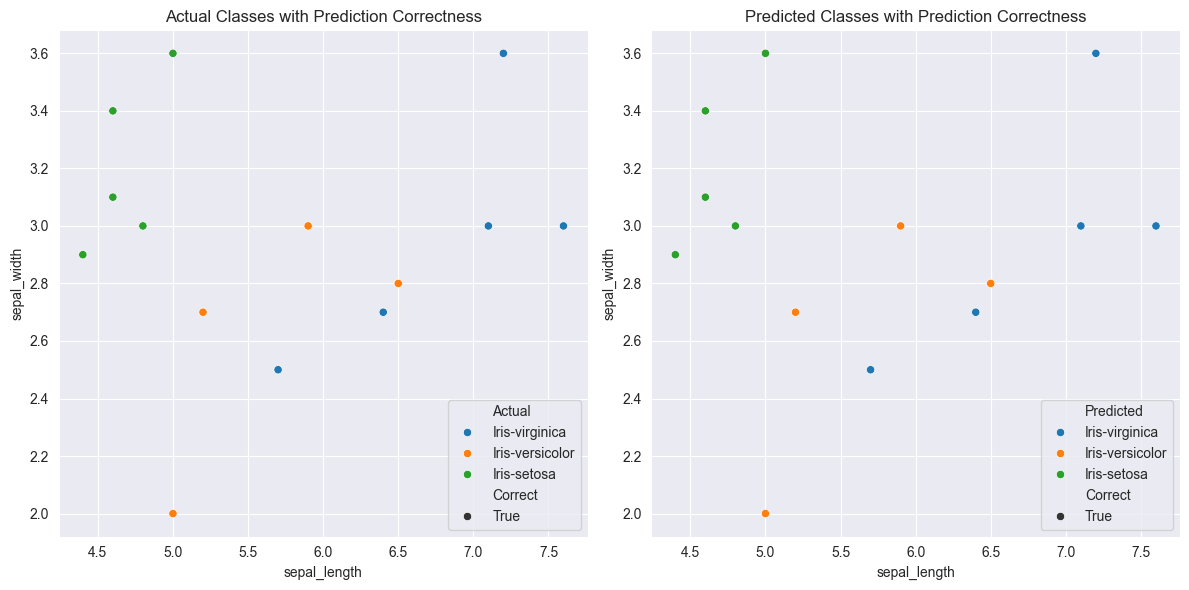

In [14]:
# Visualize the predictions
plt.figure(figsize=(12, 6))

# Create a DataFrame with actual and predicted values
results_df = pd.DataFrame({
    'Feature 1': X_test[:, 0],
    'Feature 2': X_test[:, 1],
    'Actual': y_test,
    'Predicted': y_pred
})

# Create a 'Correct' column
results_df['Correct'] = results_df['Actual'] == results_df['Predicted']

# Plot predictions
plt.subplot(1, 2, 1)
sns.scatterplot(x='Feature 1', y='Feature 2', hue='Actual', style='Correct', data=results_df)
plt.title('Actual Classes with Prediction Correctness')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])

plt.subplot(1, 2, 2)
sns.scatterplot(x='Feature 1', y='Feature 2', hue='Predicted', style='Correct', data=results_df)
plt.title('Predicted Classes with Prediction Correctness')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])

plt.tight_layout()
plt.show()